# Importing packages

In [22]:
import pandas as pd
import numpy as np
import pickle 

from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib
from sklearn.datasets import load_boston

%matplotlib inline

# load Data

In [34]:
boston = load_boston()

In [35]:
df = pd.DataFrame(boston.data)

In [36]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [26]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

In [6]:
print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

# Prepare data for Training and testing

In [7]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)

In [30]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
Y = pd.DataFrame(boston.target, columns=['price'])

In [10]:
Y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


# Split data into training and testing samples

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=5)

# Train the model

In [12]:
lm = LinearRegression()

In [13]:
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# evaluating model

In [14]:
y_pred = lm.predict(X_test)
print("regression Co-eff: \t",lm.coef_[0])
print("")
print("Accuracy: \t", lm.score(X_test,Y_test))
print("")
print("Mean Squared Error: \t", mean_squared_error(Y_test, y_pred))
print("")
print("variance Score: \t",r2_score(Y_test, y_pred))

regression Co-eff: 	 [ -1.30297070e-01   4.93739220e-02   1.52699792e-03   2.70755661e+00
  -1.60074619e+01   3.40741645e+00   1.18339212e-03  -1.49381089e+00
   3.64266500e-01  -1.31647943e-02  -9.53457936e-01   1.18685182e-02
  -5.94883957e-01]

Accuracy: 	 0.733020681871

Mean Squared Error: 	 20.9028436804

variance Score: 	 0.733020681871


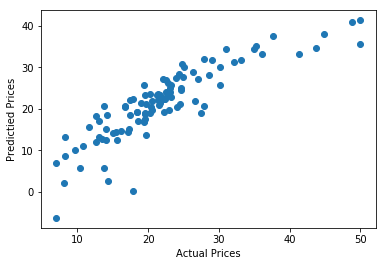

In [15]:
plt.scatter(Y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predictied Prices')

# prediction

In [16]:
predicted_price = lm.predict(X.loc[[0][:]])
predicted_price

array([[ 30.23474895]])

# saving the model

In [17]:
joblib.dump(lm, "bostonHousePrice_model.joblib")

['bostonHousePrice_model.joblib']

# importing and predicting the model

In [18]:
model = joblib.load("bostonHousePrice_model.joblib")

In [19]:
model.score(X_test,Y_test)

0.73302068187093572

In [20]:
help(r2_score)

Help on function r2_score in module sklearn.metrics.regression:

r2_score(y_true, y_pred, sample_weight=None, multioutput=None)
    R^2 (coefficient of determination) regression score function.
    
    Best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a R^2 score of 0.0.
    
    Read more in the :ref:`User Guide <r2_score>`.
    
    Parameters
    ----------
    y_true : array-like of shape = (n_samples) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape = (n_samples) or (n_samples, n_outputs)
        Estimated target values.
    
    sample_weight : array-like of shape = (n_samples), optional
        Sample weights.
    
    multioutput : string in ['raw_values', 'uniform_average', 'variance_weighted'] or None or array-like of shape (n_outputs)
    
        Defin